In [1]:
#import pandas, numpy, matplotlib, sklearn, seaborn, stats

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
from sklearn.svm import LinearSVC, SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
#set plots to display in the jupyter notebook
%matplotlib inline

#change plotting colors per client request
plt.style.use('ggplot')

#increase default figure size and font sizes for easy visability
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [2]:
#read csv file
data = pd.read_csv('./data/top50.csv', sep=',', encoding='latin-1')

In [3]:
#dataframe for top 50 spotify songs
data

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,8,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


In [13]:
data.columns

Index(['Unnamed: 0', 'Track.Name', 'Artist.Name', 'Genre', 'Beats.Per.Minute',
       'Energy', 'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.',
       'Length.', 'Acousticness..', 'Speechiness.', 'Popularity'],
      dtype='object')

In [3]:
#rename columns
data.rename(columns={'Unnamed: 0':'Standing', 'Beats.Per.Minute':'Beats_Per_Minute',
                    'Loudness..dB..':'Loudness','Valence.':'Valence','Length.':'Length',
                    'Acousticness..':'Acousticness','Speechiness.':'Speechiness'}, inplace = True)

In [4]:
data.columns

Index(['Standing', 'Track.Name', 'Artist.Name', 'Genre', 'Beats_Per_Minute',
       'Energy', 'Danceability', 'Loudness', 'Liveness', 'Valence', 'Length',
       'Acousticness', 'Speechiness', 'Popularity'],
      dtype='object')

In [16]:
data.head(3)

,Standing,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85


In [17]:
data['Genre'].unique()

array(['canadian pop', 'reggaeton flow', 'dance pop', 'pop', 'dfw rap',
       'trap music', 'country rap', 'electropop', 'reggaeton',
       'panamanian pop', 'canadian hip hop', 'latin', 'escape room',
       'pop house', 'australian pop', 'edm', 'atl hip hop', 'big room',
       'boy band', 'r&b en espanol', 'brostep'], dtype=object)

In [18]:
data['Genre'].value_counts()

dance pop           8
pop                 7
latin               5
canadian hip hop    3
edm                 3
canadian pop        2
reggaeton           2
reggaeton flow      2
electropop          2
panamanian pop      2
brostep             2
country rap         2
dfw rap             2
boy band            1
australian pop      1
big room            1
trap music          1
r&b en espanol      1
escape room         1
atl hip hop         1
pop house           1
Name: Genre, dtype: int64

In [19]:
data['Artist.Name'].value_counts()

Ed Sheeran          4
Ariana Grande       2
J Balvin            2
Lil Nas X           2
Sech                2
Billie Eilish       2
Post Malone         2
The Chainsmokers    2
Shawn Mendes        2
Marshmello          2
Lil Tecca           1
Kygo                1
DJ Snake            1
Drake               1
Bad Bunny           1
Daddy Yankee        1
Ali Gatie           1
Tones and I         1
Lauv                1
Lunay               1
Lewis Capaldi       1
Martin Garrix       1
Taylor Swift        1
Chris Brown         1
MEDUZA              1
Anuel AA            1
Khalid              1
Jonas Brothers      1
Lady Gaga           1
Young Thug          1
Jhay Cortez         1
Y2K                 1
Maluma              1
Katy Perry          1
Sam Smith           1
Nicky Jam           1
Lizzo               1
ROSALÍA             1
Name: Artist.Name, dtype: int64

In [131]:
#statistics for each column in top 50 spotify songs
data[['Beats_Per_Minute', 'Energy',
       'Danceability', 'Loudness', 'Liveness', 'Valence', 'Length', 'Acousticness', 'Speechiness',
       'Popularity']].describe()

,Beats Per Minute,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
count,50.000,50.000,50.00,50.000,50.000,50.000,50.000,50.000,50.000,50.000
mean,120.060,64.060,71.38,-5.660,14.660,54.600,200.960,22.160,12.480,87.500
std,30.898,14.232,11.93,2.056,11.118,22.336,39.144,18.996,11.162,4.491
min,85.000,32.000,29.00,-11.000,5.000,10.000,115.000,1.000,3.000,70.000
25%,96.000,55.250,67.00,-6.750,8.000,38.250,176.750,8.250,5.000,86.000
50%,104.500,66.500,73.50,-6.000,11.000,55.500,198.000,15.000,7.000,88.000
75%,137.500,74.750,79.75,-4.000,15.750,69.500,217.500,33.750,15.000,90.750
max,190.000,88.000,90.00,-2.000,58.000,95.000,309.000,75.000,46.000,95.000


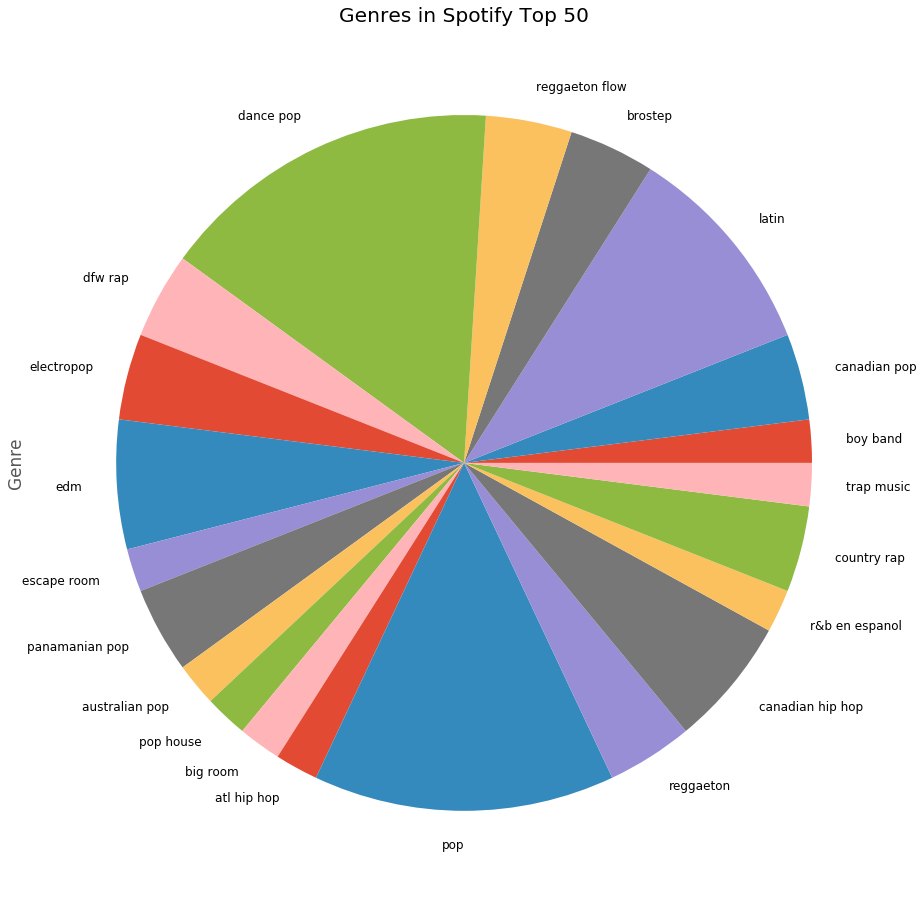

In [71]:
#plotting pie chart of genre for top 50 songs
data['Genre'].value_counts(sort=False).plot.pie(figsize=(24,16), fontsize = 12)
plt.title('Genres in Spotify Top 50')
plt.show()

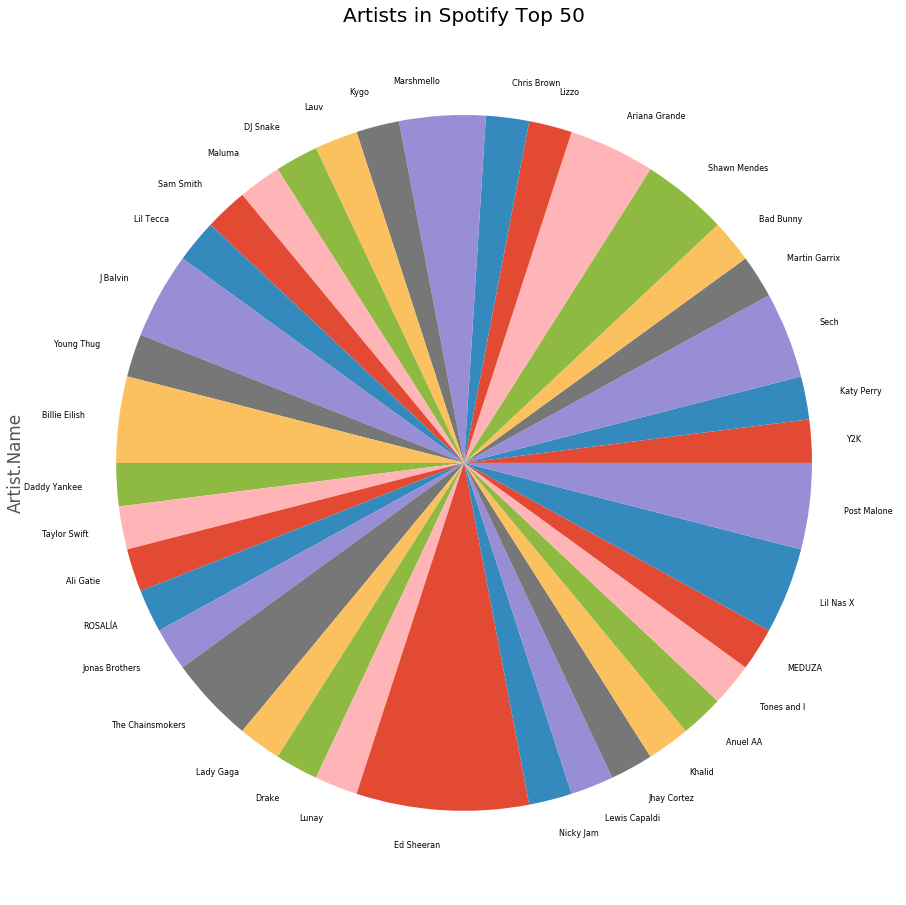

In [70]:
#plotting pie chart of genre for top 50 songs
data['Artist.Name'].value_counts(sort=False).plot.pie(figsize=(24,16), fontsize = 8)
plt.title('Artists in Spotify Top 50')
plt.show()

In [20]:
data.select_dtypes(include='number').iloc[:,-10:]

,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,117,55,76,-6,8,75,191,4,3,79
1,105,81,79,-4,8,61,302,8,9,92
2,190,80,40,-4,16,70,186,12,46,85
3,93,65,64,-8,8,55,198,12,19,86
4,150,65,58,-4,11,18,175,45,7,94
5,102,68,80,-5,9,84,220,9,4,84
6,180,64,75,-6,7,23,131,2,29,92
7,111,68,48,-5,8,35,202,15,9,90
8,136,62,88,-6,11,64,157,5,10,87
9,135,43,70,-11,10,56,194,33,38,95


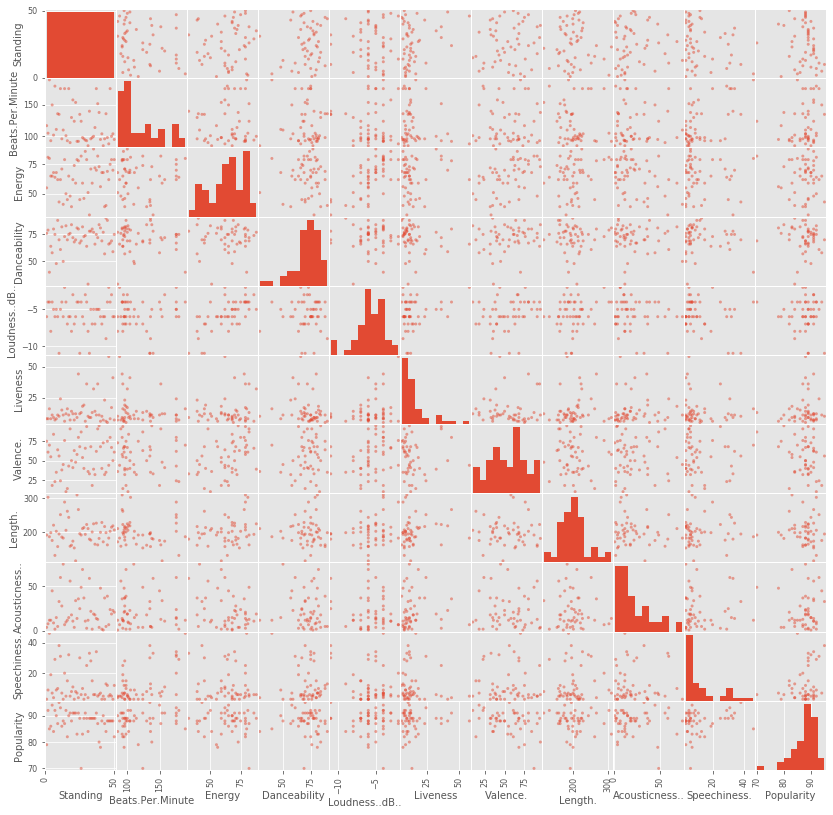

In [75]:
#scatter matrix of top 50 spotify songs
scatter_matrix = pd.plotting.scatter_matrix(
    data.select_dtypes(include='number').iloc[:,-11:],
    figsize=(14,14)
);
for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 10)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 10)

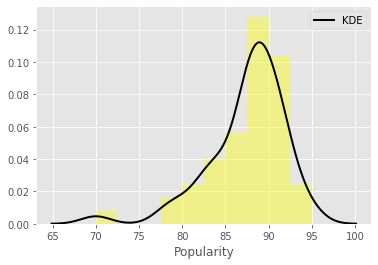

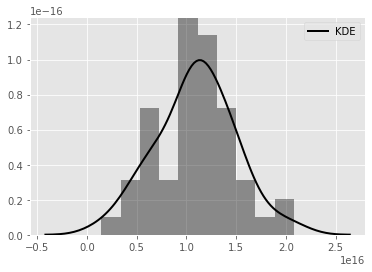

In [4]:
#distribution plot of popularity of top 50 spotify songs
transform1=np.asarray(data[['Popularity']].values)
df_transform1 = stats.boxcox(transform1)[0]
sns.distplot(data['Popularity'],bins=10,kde=True,kde_kws={"color": "k", "lw": 2, "label": "KDE"},color='yellow')
plt.show()
sns.distplot(df_transform1,bins=10,kde=True,kde_kws={"color": "k", "lw": 2, "label": "KDE"},color='black')
plt.show()

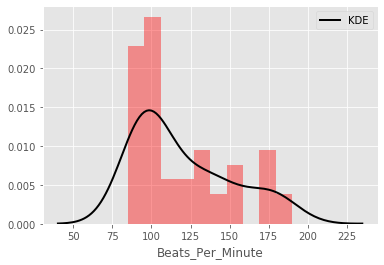

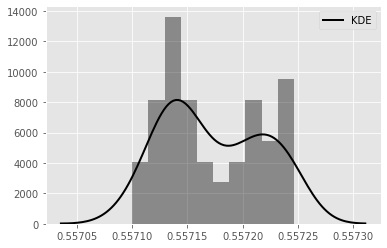

In [16]:
#distribution plot of beats per minute of top 50 spotify songs
transform1=np.asarray(data[['Beats_Per_Minute']].values)
df_transform1 = stats.boxcox(transform1)[0]
sns.distplot(data['Beats_Per_Minute'],bins=10,kde=True,kde_kws={"color": "k", "lw": 2, "label": "KDE"},color='red')
plt.show()
sns.distplot(df_transform1,bins=10,kde=True,kde_kws={"color": "k", "lw": 2, "label": "KDE"},color='black')
plt.show()

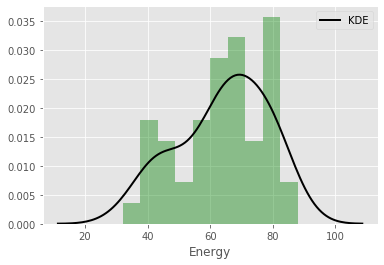

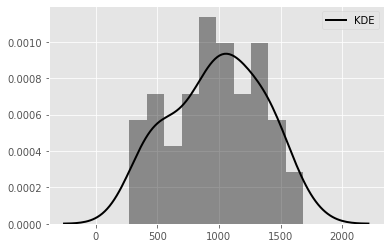

In [17]:
#distribution plot of energy of top 50 spotify songs
transform1=np.asarray(data[['Energy']].values)
df_transform1 = stats.boxcox(transform1)[0]
sns.distplot(data['Energy'],bins=10,kde=True,kde_kws={"color": "k", "lw": 2, "label": "KDE"},color='green')
plt.show()
sns.distplot(df_transform1,bins=10,kde=True,kde_kws={"color": "k", "lw": 2, "label": "KDE"},color='black')
plt.show()

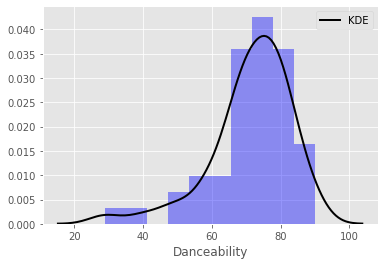

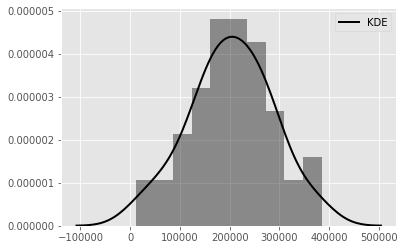

In [18]:
#distribution plot of danceability of top 50 spotify songs
transform1=np.asarray(data[['Danceability']].values)
df_transform1 = stats.boxcox(transform1)[0]
sns.distplot(data['Danceability'],bins=10,kde=True,kde_kws={"color": "k", "lw": 2, "label": "KDE"},color='blue')
plt.show()
sns.distplot(df_transform1,bins=10,kde=True,kde_kws={"color": "k", "lw": 2, "label": "KDE"},color='black') 
plt.show()

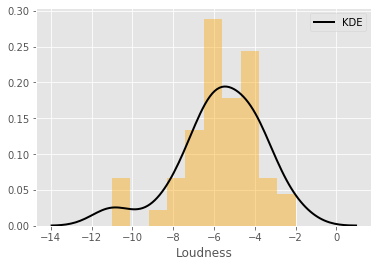

In [19]:
#distribution plot of loudness of top 50 spotify songs
transform1=np.asarray(data[['Loudness']].values)
sns.distplot(data['Loudness'],bins=10,kde=True,kde_kws={"color": "k", "lw": 2, "label": "KDE"},color='orange')
plt.show()

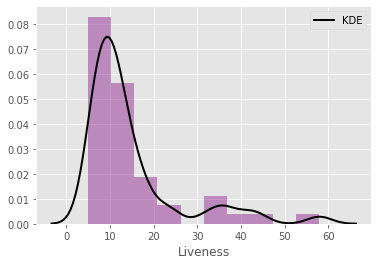

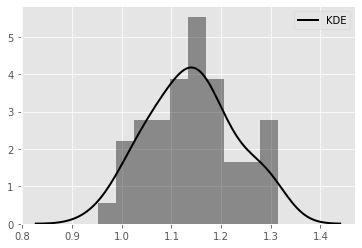

In [20]:
#distribution plot of liveness of top 50 spotify songs
transform1=np.asarray(data[['Liveness']].values)
df_transform1 = stats.boxcox(transform1)[0]
sns.distplot(data['Liveness'],bins=10,kde=True,kde_kws={"color": "k", "lw": 2, "label": "KDE"},color='purple')
plt.show()
sns.distplot(df_transform1,bins=10,kde=True,kde_kws={"color": "k", "lw": 2, "label": "KDE"},color='black') 
plt.show()

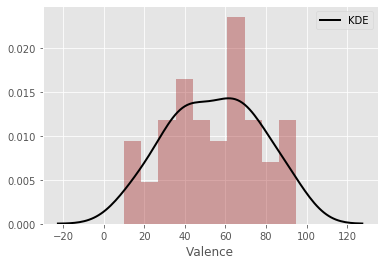

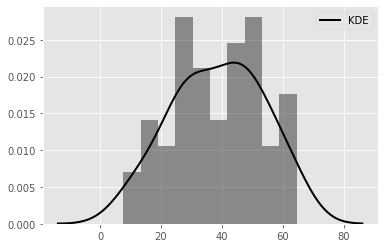

In [21]:
#distribution plot of valence of top 50 spotify songs
transform1=np.asarray(data[['Valence']].values)
df_transform1 = stats.boxcox(transform1)[0]
sns.distplot(data['Valence'],bins=10,kde=True,kde_kws={"color": "k", "lw": 2, "label": "KDE"},color='brown')
plt.show()
sns.distplot(df_transform1,bins=10,kde=True,kde_kws={"color": "k", "lw": 2, "label": "KDE"},color='black') 
plt.show()

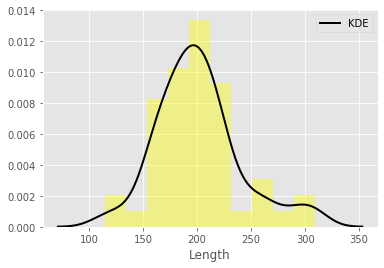

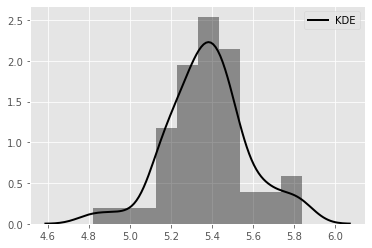

In [24]:
#distribution plot of length of top 50 spotify songs
transform1=np.asarray(data[['Length']].values)
df_transform1 = stats.boxcox(transform1)[0]
sns.distplot(data['Length'],bins=10,kde=True,kde_kws={"color": "k", "lw": 2, "label": "KDE"},color='yellow')
plt.show()
sns.distplot(df_transform1,bins=10,kde=True,kde_kws={"color": "k", "lw": 2, "label": "KDE"},color='black') 
plt.show()

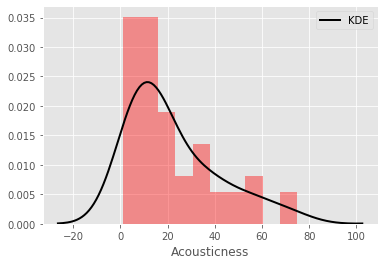

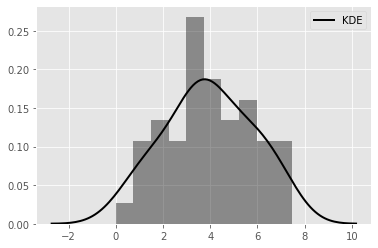

In [25]:
#distribution plot of acousticness of top 50 spotify songs
transform1=np.asarray(data[['Acousticness']].values)
df_transform1 = stats.boxcox(transform1)[0]
sns.distplot(data['Acousticness'],bins=10,kde=True,kde_kws={"color": "k", "lw": 2, "label": "KDE"},color='red')
plt.show()
sns.distplot(df_transform1,bins=10,kde=True,kde_kws={"color": "k", "lw": 2, "label": "KDE"},color='black') 
plt.show()

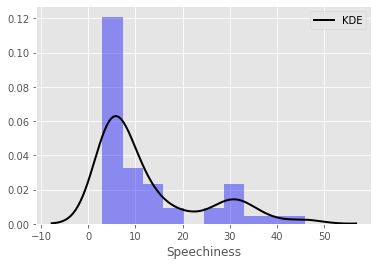

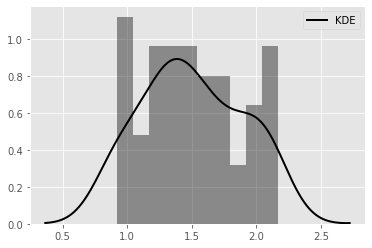

In [26]:
#distribution plot of speechiness of top 50 spotify songs
transform1=np.asarray(data[['Speechiness']].values)
df_transform1 = stats.boxcox(transform1)[0]
sns.distplot(data['Speechiness'],bins=10,kde=True,kde_kws={"color": "k", "lw": 2, "label": "KDE"},color='blue')
plt.show()
sns.distplot(df_transform1,bins=10,kde=True,kde_kws={"color": "k", "lw": 2, "label": "KDE"},color='black') 

In [28]:
#correlation of top 50 spotify songs
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
correlation=data.corr(method='spearman')
print(correlation)

                  Standing  Beats_Per_Minute  Energy  Danceability  Loudness  Liveness  Valence  \
Standing             1.000            -0.263   0.132         0.053    -0.014     0.102    0.113   
Beats_Per_Minute    -0.263             1.000   0.012        -0.092     0.014    -0.033   -0.048   
Energy               0.132             0.012   1.000        -0.049     0.635     0.013    0.467   
Danceability         0.053            -0.092  -0.049         1.000     0.009    -0.261    0.155   
Loudness            -0.014             0.014   0.635         0.009     1.000     0.114    0.317   
Liveness             0.102            -0.033   0.013        -0.261     0.114     1.000   -0.187   
Valence              0.113            -0.048   0.467         0.155     0.317    -0.187    1.000   
Length               0.045            -0.198   0.189        -0.079     0.165     0.202   -0.081   
Acousticness         0.058            -0.010  -0.211        -0.128    -0.040     0.204   -0.053   
Speechines

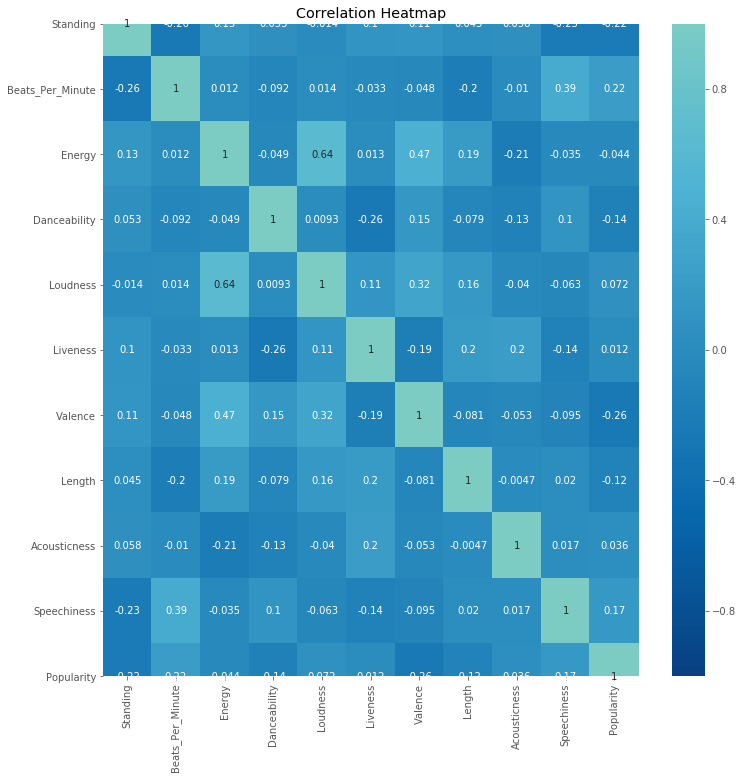

In [29]:
#correlation heatmap
plt.figure(figsize=(12,12))
plt.title('Correlation Heatmap')
sns.heatmap(correlation,annot=True,vmin=-1,vmax=1,cmap="GnBu_r",center=1)

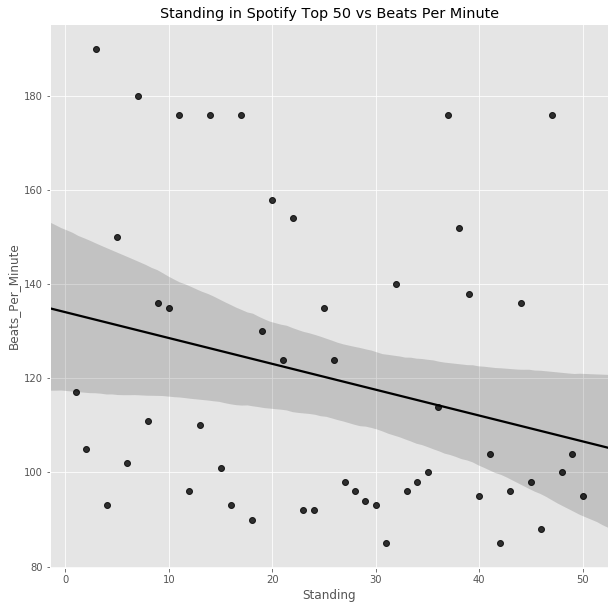

In [30]:
#standing vs beats per minute
fig=plt.subplots(figsize=(10,10))
sns.regplot(x='Standing', y='Beats_Per_Minute',data=data,color='black')
plt.title('Standing in Spotify Top 50 vs Beats Per Minute');

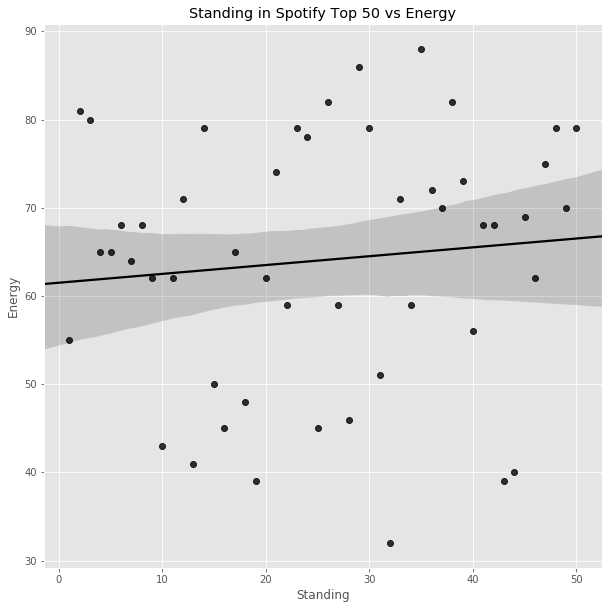

In [31]:
#standing vs energy
fig=plt.subplots(figsize=(10,10))
sns.regplot(x='Standing', y='Energy',data=data,color='black')
plt.title('Standing in Spotify Top 50 vs Energy');

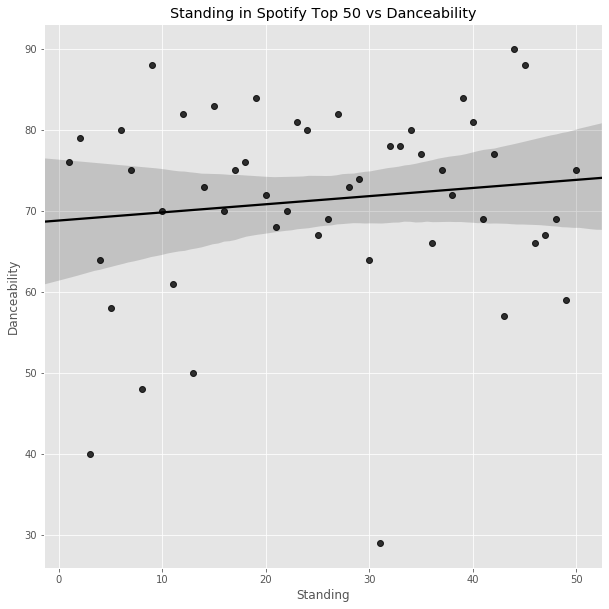

In [32]:
#standing vs danceability
fig=plt.subplots(figsize=(10,10))
sns.regplot(x='Standing', y='Danceability',data=data,color='black')
plt.title('Standing in Spotify Top 50 vs Danceability');

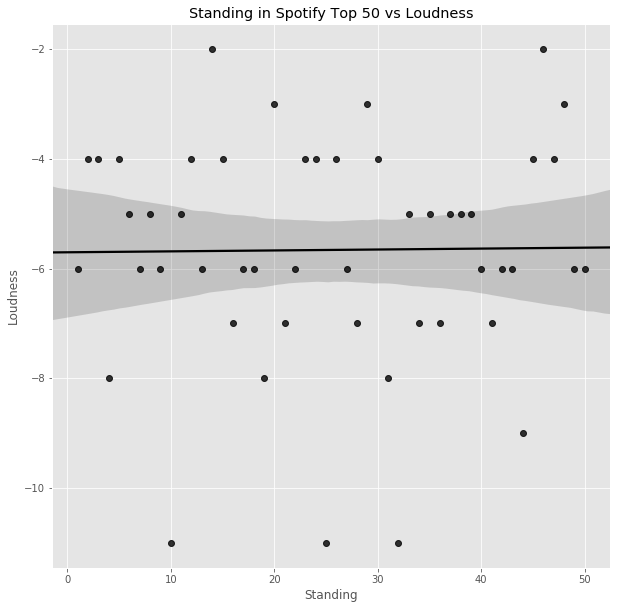

In [33]:
#standing vs loudness
fig=plt.subplots(figsize=(10,10))
sns.regplot(x='Standing', y='Loudness',data=data,color='black')
plt.title('Standing in Spotify Top 50 vs Loudness');

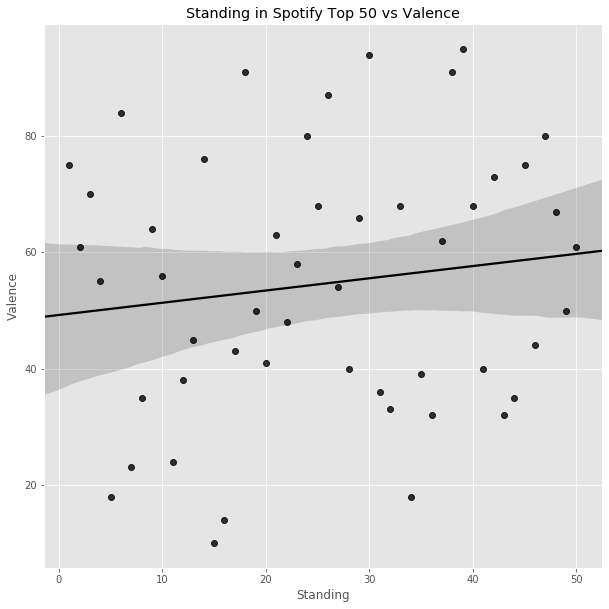

In [34]:
#standing vs valence
fig=plt.subplots(figsize=(10,10))
sns.regplot(x='Standing', y='Valence',data=data,color='black')
plt.title('Standing in Spotify Top 50 vs Valence');

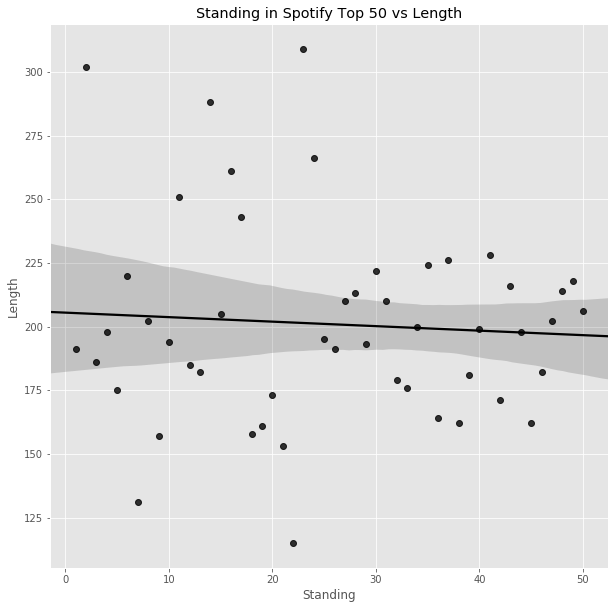

In [35]:
#standing vs lenth
fig=plt.subplots(figsize=(10,10))
sns.regplot(x='Standing', y='Length',data=data,color='black')
plt.title('Standing in Spotify Top 50 vs Length');

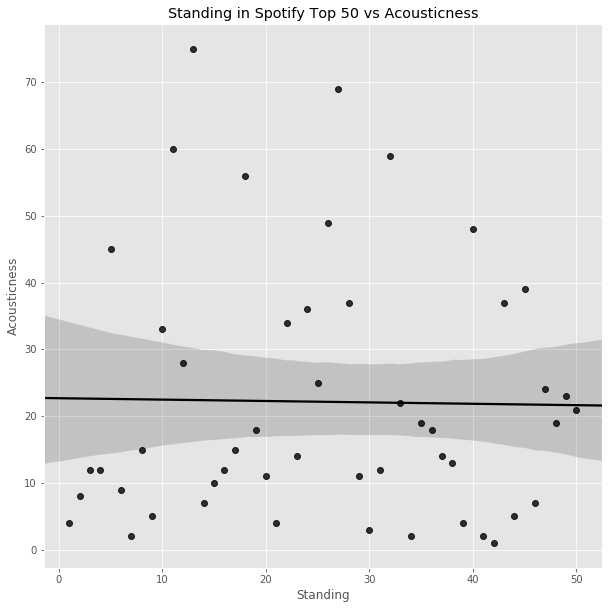

In [36]:
#standing vs acousticness
fig=plt.subplots(figsize=(10,10))
sns.regplot(x='Standing', y='Acousticness',data=data,color='black')
plt.title('Standing in Spotify Top 50 vs Acousticness');

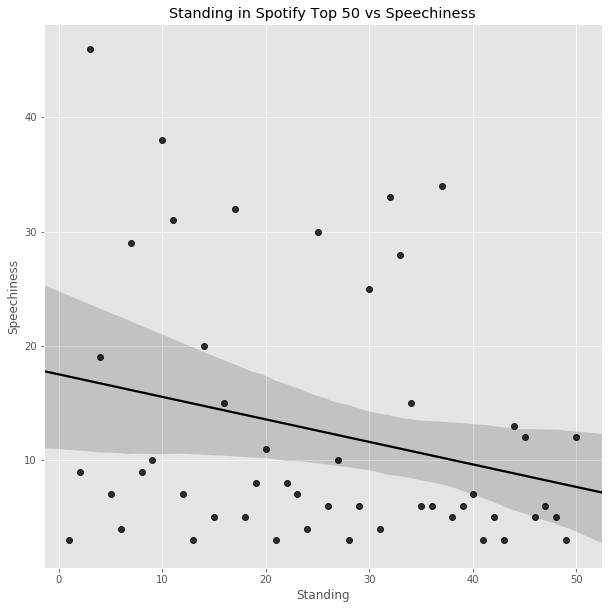

In [37]:
#standing vs speechiness
fig=plt.subplots(figsize=(10,10))
sns.regplot(x='Standing', y='Speechiness',data=data,color='black')
plt.title('Standing in Spotify Top 50 vs Speechiness');

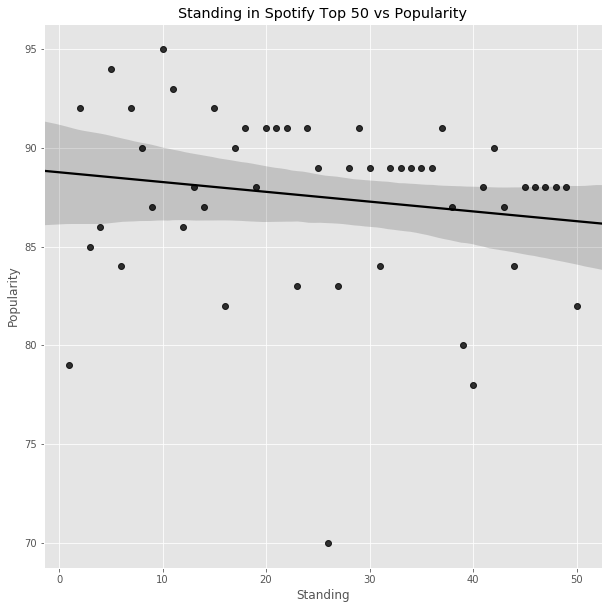

In [38]:
#standing vs popularity
fig=plt.subplots(figsize=(10,10))
sns.regplot(x='Standing', y='Popularity',data=data,color='black')
plt.title('Standing in Spotify Top 50 vs Popularity');

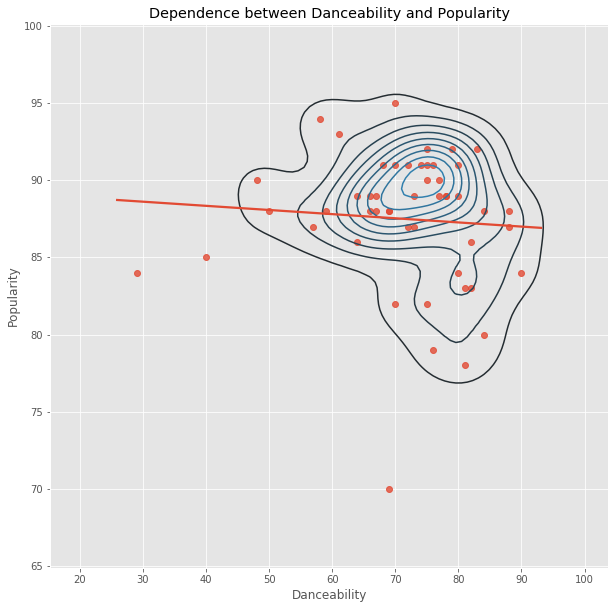

In [10]:
#dependence between danceability and popularity
fig=plt.subplots(figsize=(10,10))
plt.title('Dependence between Danceability and Popularity')
sns.regplot(x='Danceability', y='Popularity',
            ci=None, data=data)
sns.kdeplot(data.Danceability,data.Popularity)

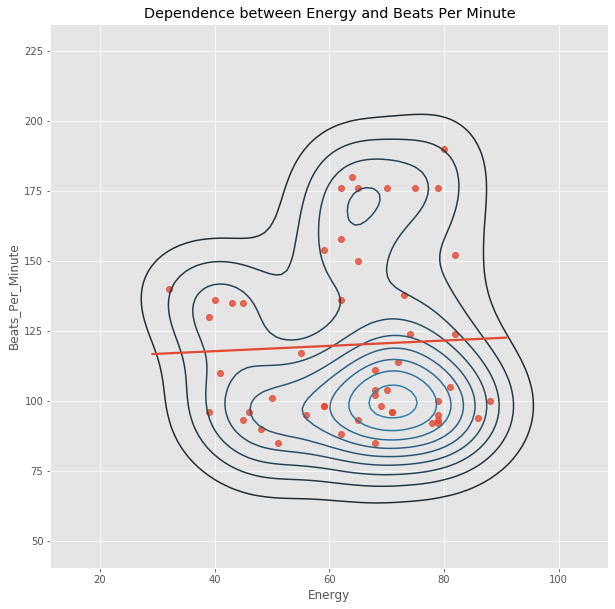

In [8]:
#dependence between energy and beats per minute
fig=plt.subplots(figsize=(10,10))
plt.title('Dependence between Energy and Beats Per Minute')
sns.regplot(x='Energy', y='Beats_Per_Minute',
            ci=None, data=data)
sns.kdeplot(data.Energy,data.Beats_Per_Minute)

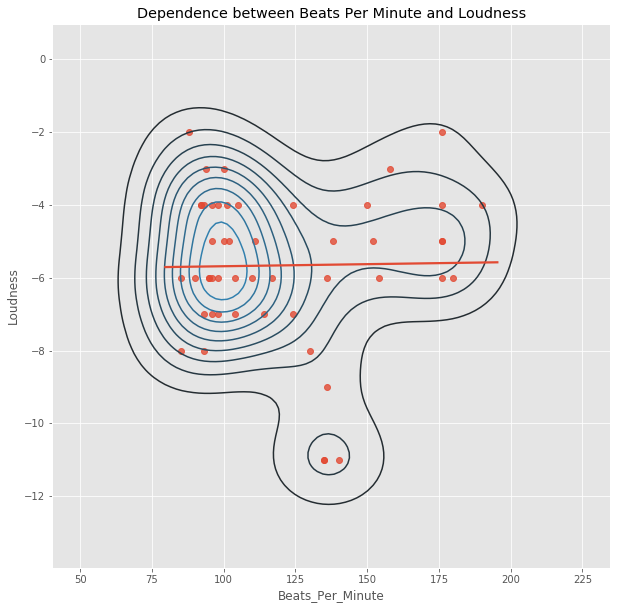

In [9]:
#dependence between beats per minute and loudness
fig=plt.subplots(figsize=(10,10))
plt.title('Dependence between Beats Per Minute and Loudness')
sns.regplot(x='Beats_Per_Minute', y='Loudness',
            ci=None, data=data)
sns.kdeplot(data.Beats_Per_Minute,data.Loudness)

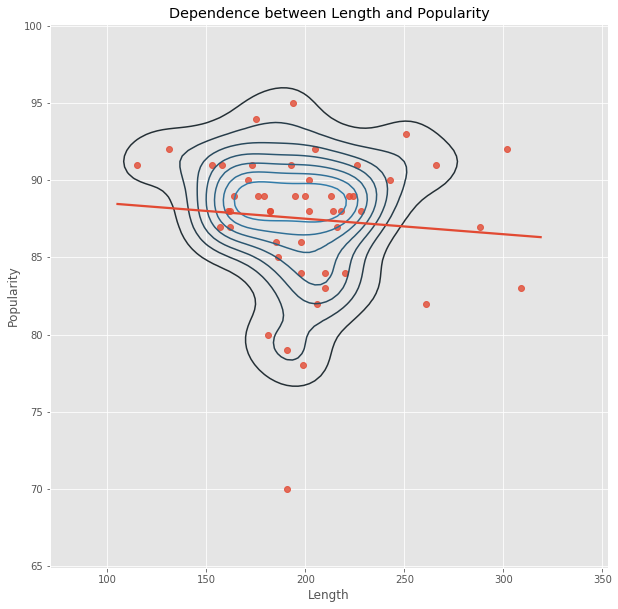

In [11]:
#dependence between length and popularity
fig=plt.subplots(figsize=(10,10))
plt.title('Dependence between Length and Popularity')
sns.regplot(x='Length', y='Popularity',
            ci=None, data=data)
sns.kdeplot(data.Length,data.Popularity)